<a href="https://colab.research.google.com/github/abhirbhandary/Python/blob/main/2_TimeSeries_Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Simple Moving Average

Here's a simple step-by-step process to calculate a Simple Moving Average:

1. Choose a time period (e.g., 5 days, 10 days, 50 days, etc.).
2. Add up the prices for that time period.
3. Divide the sum by the number of data points in the time period.

Repeat these steps as new data becomes available to continually update the moving average.

In [16]:
# In 2024 pdr.get_data_yahoo('TSLA') doesnot work use this instead
import yfinance as yf
import pandas as pd
from datetime import datetime

In [17]:
df = yf.download('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.tail()

In [ ]:
df['Open'].plot(figsize=(15,6))

In [21]:
df['Open:10 days rolling']=df['Open'].rolling(window = 10, min_periods=1).mean()

In [ ]:
df[['Open','Open:10 days rolling']].plot(figsize=(15,6))

<Axes: xlabel='Date'>

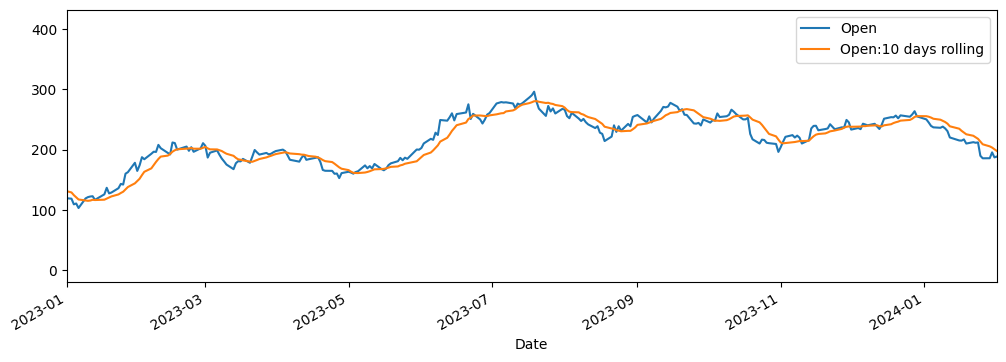

In [12]:
df[['Open','Open:10 days rolling']].plot(xlim=['2023-01-01','2024-02-01'],figsize=(12,4))

Disadvantages of Simple Moving Average:

1. Same importance to all the data values.

### 2. Cumulative Moving Average (CMA)

A Cumulative Moving Average (CMA) is a variation of the Simple Moving Average (SMA) that calculates an average by including all data points from the beginning of the dataset up to the current point in time. Unlike the SMA, which considers only a fixed time period, the CMA incorporates all available data, making it a cumulative measure.

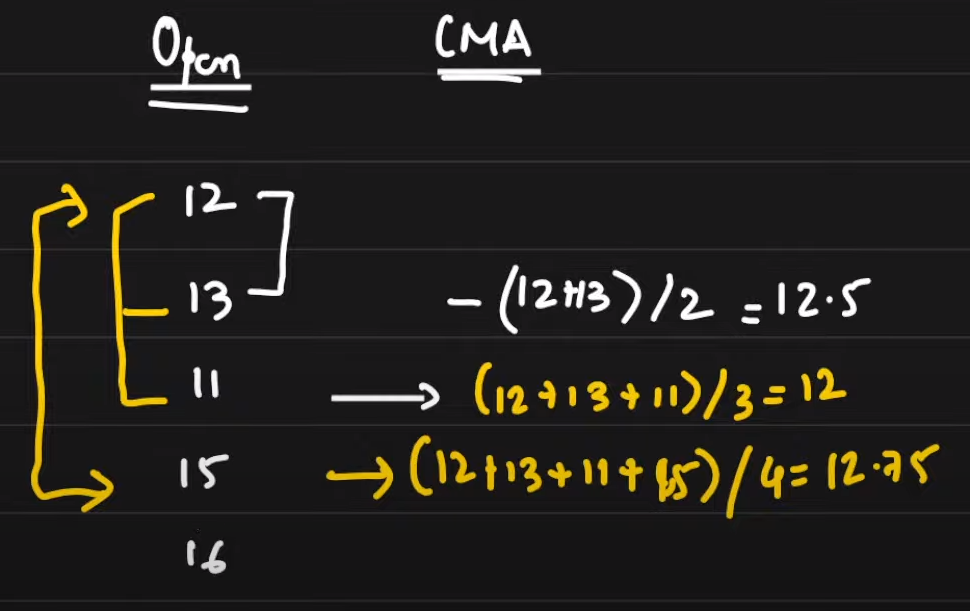

In [27]:
## Expanding fuction to get this result

df['Cumulative Moving Average']=df['Open'].expanding().mean()

### 3. Exponential Moving Average (EMA)

The Exponential Moving Average (EMA) is a type of weighted moving average that gives more weight to recent data points, making it more responsive to changes in the underlying data compared to the Simple Moving Average (SMA). The EMA assigns exponentially decreasing weights to each data point, with the most recent data points receiving a higher weight.

In [23]:
df['EMA_0.1']=df['Open'].ewm(alpha=0.1, adjust=False).mean()

<Axes: xlabel='Date'>

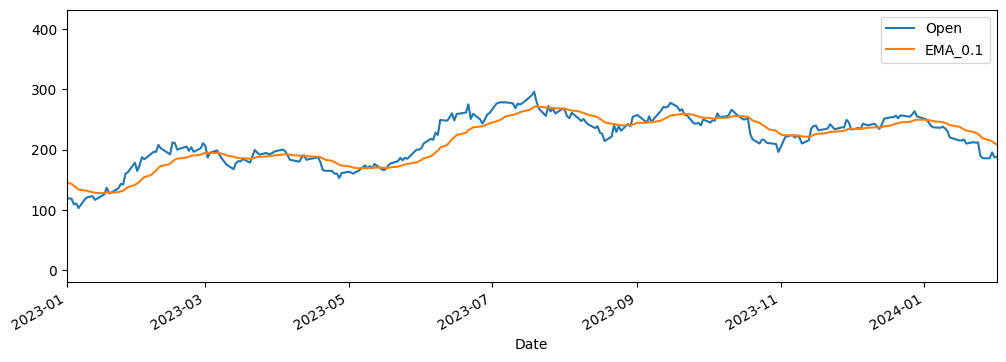

In [24]:
df[['Open','EMA_0.1']].plot(xlim=['2023-01-01','2024-02-01'],figsize=(12,4))

### 4. Which Moving Average is the best

<Axes: xlabel='Date'>

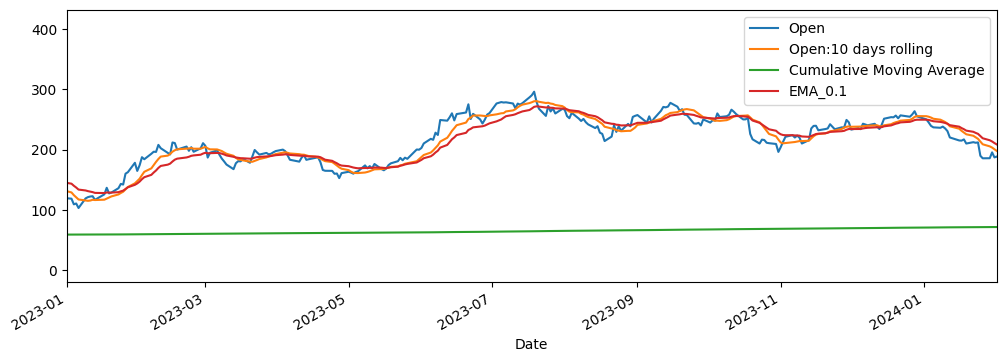

In [28]:
df[['Open','Open:10 days rolling','Cumulative Moving Average','EMA_0.1']].plot(xlim=['2023-01-01','2024-02-01'],figsize=(12,4))